## PyTorch Model

In this project we will go through the following models:

- [Tensor Basics - Create, operation, GPU support](#tensors)
- [Autograd - Linear regression model](#autograd)
- [Training Loop with: Model, Loss, and Optimizer](#training)
- [Neural Network - Datasets, DataLoader, Transforms, and Evaluation](#fneuron)
- [Convolutional Neural Network - save/load model](#cnnnetwork)

In [3]:
## first the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

<a id='tensors'></a>
### Tensor Basics

In PyTorch everything is based on tensors, which are multi-dimensional matrices containing the elements of a single data type.

In [10]:
## empty matrices
## which basically grabs random blocks of memory
## which we can create scalar
sca = torch.empty(1) 
## or vectors
vec = torch.empty(5)
## or matrices
matr = torch.empty(3, 3)
## or multi-dimentional tensors
mult = torch.empty(3, 3, 3)
## we can aslo create random matrices
## very similar to numpy
random = torch.rand(2, 3, 4)
## or zeros
zeros = torch.zeros(3, 4, 5)
## or ones
ones = torch.ones(2, 2, 3)
ones

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [15]:
## we can check the size and shape of the tensors
print(zeros.size())
print(ones.shape)
## and we can simply access the values
print(ones.shape[1])
## we can also check the data type
print(ones.dtype)
## by default the type is float32
## but we can change it when constructing the tensor
tn = torch.rand(2, 3, dtype=torch.float16)
print(tn.dtype)

torch.Size([3, 4, 5])
torch.Size([2, 2, 3])
2
torch.float32
torch.float16


In [41]:
## we can also create tensors from list or arrays
lst = range(11)
tnfls = torch.tensor(lst, dtype = torch.int16)
print(tnfls)
arr = np.linspace(0, 11, 20)
## this will create a copy
tnfar = torch.tensor(arr, dtype=torch.float16)
print(tnfar)
## where this way they'll share the same memory
tnfarsm = torch.from_numpy(arr)
print(tnfarsm)
## slicing is similar to np arrays as well
print(zeros[:, 1])
print(zeros[0, :])
## or access one item in specific index
print(zeros[0,0, 0].item())
## we can also reshape the tensor 
nten = tnfar.view(4, 5)
print(nten.shape)
## we can create a np array from a tensor
## but we have to be carefull if we're using CPU
## because they'll share the same memory loc
## and change in one will change the other as well
arrftn = tnfar.numpy()
## we can aslo have pytorch calculating 
## the gradient for a tensor
## which can be useful when we're optimizing 
arr2 = np.linspace(0, 6, 30)
grtn = torch.tensor(arr2, dtype = torch.float16, requires_grad=True)
grtn

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=torch.int16)
tensor([ 0.0000,  0.5791,  1.1582,  1.7373,  2.3164,  2.8945,  3.4746,  4.0508,
         4.6328,  5.2109,  5.7891,  6.3672,  6.9492,  7.5273,  8.1016,  8.6875,
         9.2656,  9.8438, 10.4219, 11.0000], dtype=torch.float16)
tensor([ 0.0000,  0.5789,  1.1579,  1.7368,  2.3158,  2.8947,  3.4737,  4.0526,
         4.6316,  5.2105,  5.7895,  6.3684,  6.9474,  7.5263,  8.1053,  8.6842,
         9.2632,  9.8421, 10.4211, 11.0000], dtype=torch.float64)
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
0.0
torch.Size([4, 5])


tensor([0.0000, 0.2069, 0.4138, 0.6206, 0.8276, 1.0342, 1.2412, 1.4482, 1.6553,
        1.8623, 2.0684, 2.2754, 2.4824, 2.6895, 2.8965, 3.1035, 3.3105, 3.5176,
        3.7246, 3.9316, 4.1367, 4.3438, 4.5508, 4.7578, 4.9648, 5.1719, 5.3789,
        5.5859, 5.7930, 6.0000], dtype=torch.float16, requires_grad=True)

In [30]:
## we can also do all the operations 
## that we can do with np arrays with tensors
rand1 = torch.rand(2, 2)
rand2 = torch.rand(2, 2)
## we can add them
rand3 = torch.add(rand1, rand2)
## or use inplace addition
## rand1.add_(rand2)
## sub
rand4 = torch.sub(rand1, rand2)
## multiply them
rand5 = torch.mul(rand1, rand2)
## divide them
rand6 = torch.div(rand1, rand2)

tensor([[1.4554, 0.7651],
        [0.8806, 1.1813]])

In [42]:
## by default all the tensors are created on CPU
## but we can move them into GPU, or create them on GPU directly
## we can create a device object
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
## and then pass it when we're creating a tensor
## by moving them after creation
nwtn = torch.rand(2, 2, dtype=torch.float16).to(device)
## or at creation, which is more efficient
nwtn2 = torch.rand(3, 3, dtype=torch.float16, device=device)
print(nwtn)
print(nwtn2)

tensor([[0.7207, 0.3691],
        [0.3076, 0.2598]], dtype=torch.float16)
tensor([[0.3145, 0.5518, 0.7104],
        [0.8188, 0.8291, 0.9517],
        [0.8564, 0.5396, 0.5063]], dtype=torch.float16)


<a id='autograd'></a>
### Autograd

The autograd package provides automatic differentiation for all operations on tensors; `torch.autograd` is an engine for computing the vector Jacobian product - it computes the partial derivates while applying the chain rule.

In [51]:
## we used the requires_grad = True in the section above
## and now we can actually see the impact
x = torch.linspace(0, 3, 10, requires_grad=True, dtype=torch.float16)
y = x + 5
print(x)
## and we can see that now there's a grad_fn for y
## and for this case is AddBackward
## which uses the backpropagation
print(y)
## and we can see if we multiply the tensors
## then the gard_fn will change to MulBackward
z = torch.sin(x)*torch.cos(y)
print(z)
## and then to add more layer
## if we get the mean then it'll become MeanBackward
z = torch.mean(z)
print(z)
## and we can calculate the gradient 
## by calling the backward on the variable
## and before calling it, there's no grad
## for the variable that we're calculating
## derivative with respect to
print(x.grad)
z.backward()
## this will contain dz/dx values
print(x.grad)
## and we have to be carefull while using this 
## because each time we call backward on a function
## the gradients accumulate and if we're looping 
## for our model training, we have to empty the grad attr

tensor([0.0000, 0.3333, 0.6665, 1.0000, 1.3330, 1.6670, 2.0000, 2.3340, 2.6660,
        3.0000], dtype=torch.float16, requires_grad=True)
tensor([5.0000, 5.3320, 5.6680, 6.0000, 6.3320, 6.6680, 7.0000, 7.3359, 7.6641,
        8.0000], dtype=torch.float16, grad_fn=<AddBackward0>)
tensor([ 0.0000,  0.1899,  0.5049,  0.8076,  0.9707,  0.9229,  0.6855,  0.3579,
         0.0864, -0.0205], dtype=torch.float16, grad_fn=<MulBackward0>)
tensor(0.4504, dtype=torch.float16, grad_fn=<MeanBackward0>)
None
tensor([ 0.0284,  0.0815,  0.0999,  0.0753,  0.0188, -0.0463, -0.0911, -0.0969,
        -0.0617,  0.0005], dtype=torch.float16)


In [58]:
## there are cases where we don't want to track our history
## during training when we want to update our weights
## or when we're evaluating the model
## to prevent the tracking
## we can use .required_grad_(False)
## or .detach()
## or use the torch.no_grad() wrapper
a = torch.linspace(0, 10, 10, requires_grad=True)
b = a * 5
print(a.requires_grad)
print(b.grad_fn)
## changing it inplace
a.requires_grad_(False)
c = a**2 + 5
print(a.requires_grad)
## and now c doesn't have a grad_fn
print(c)
## if we want to create a copy instead
## we can use detach
a.requires_grad_(True)
d = a.detach()
print(a.requires_grad)
print(d.requires_grad)
## and the 3rd way that's common for evaluation step
with torch.no_grad():
    e = a ** 2 + 5
    print(e.grad_fn)

True
False
tensor([  5.0000,   6.2346,   9.9383,  16.1111,  24.7531,  35.8642,  49.4444,
         65.4938,  84.0124, 105.0000])
True
False
None


#### Gradient Descent by Autograd

reminder:
$ f(x) =  \omega \times x + b$

In [77]:
## lets create a simple example
x = torch.arange(start=0, end=11)
y = x * 4
## create our initial valuse for w and b
## and we need to set the requires_grad to True
## and we will use a simple example with no intercept
w = torch.zeros(1, requires_grad=True)
## our main function will be 
def func(x, w):
    return w * x
## and then our loss is simply
## mean squared errors for y values
def loss(yhat, y):
    return torch.mean((yhat-y)**2)
## and then we can start with training
## we also need a learning rate
learning_rate = 0.01
for _ in range(100):
    ## first we calculate yhat
    yhat = func(x, w)
    ## and then the loss values
    l = loss(yhat, y)
    ## and all we need to do now is to call
    ## backward on loss
    l.backward()
    ## and then we only have to update w
    ## using the gradients
    ## and we don't want them to accumulate
    with torch.no_grad():
        w -= learning_rate * w.grad.data
    ## and then after updating the w
    ## we will empty the gradients 
    ## for the next loop
    w.grad.data.zero_()
    
print(f'The calculated loss value {l}, with w = {w.item()}, and for testing f(x=3) = {func(3, w).item()}')

The calculated loss value 0.0, with w = 4.0, and for testing f(x=3) = 12.0


<a id='training'></a>
#### Working with models, loss, and optimizers

A PyTorch pipeline is usually like this:

    1. Model Design - input, output, forward pass with multiple layers
    2. Construct loss and optimizer
    3. Training loop
        - Forward - computing prediction and loss
        - Backward - computing gradients
        - Updating the weights

In [112]:
## we will create our own model, by using nn module
from torch import nn
## and our class should inherit from nn
class LinearRegression(nn.Module):
    ## and we only need the input and output dimensions
    def __init__(self, input_d, output_d):
        ## we have to also use super
        super(LinearRegression, self).__init__()
        ## we have to then create the linear model
        self.lin = nn.Linear(input_d,output_d)
    ## the next step is to create our forward func
    def forward(self, x):
        return self.lin(x)
    
## we also need some sample data to use
## which we want 10 samples for one featue
X = torch.arange(1, 11, dtype=torch.float32).view(10, 1)
y = 2 * X 
## then we have to create an instance of our model
## by passing the # of features
model = LinearRegression(X.shape[1], X.shape[1])
## and then our loss function
loss = nn.MSELoss()
## and then our optimizer, which we will use 
## Stochastic Greadient Descent from pytorch
## and pass the model parameters and the learning rate
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
## and we have to loop through and update our w
for _ in range(200):
    ## first we have to calculate our yhat
    yhat = model(X)
    ## and then calculating the loss
    l = loss(y, yhat)
    ## and then calculate the gradients
    l.backward()
    ## and then updating our params
    optimizer.step()
    ## and finally, zeroing out our 
    optimizer.zero_grad()
## and at the end, we get the calculated values for w and b
w, b = model.parameters()
print(f'w:{w.item()}, loss:{l}; f(x=3.0) = {model(torch.tensor([3.0])).item()}')

w:1.9741042852401733, loss:0.0070242201909422874; f(x=3.0) = 6.102593898773193


<a id='fneuron'></a>

### First Neural Net

GPU, Datasets, DataLoader, Transforms, Neural Net, Training, and Evaluation.

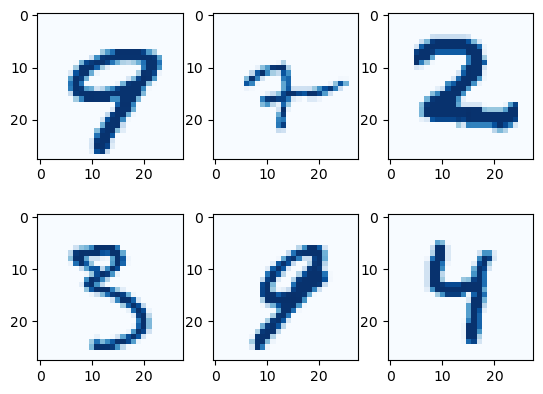

In [123]:
## first the imports
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## first defining the parameters
## the image sizes when flatten
input_size = 28*28
hidden_size = 500
## the size of each batch
batch_size = 100
## having 10 digit in the class
n_classes = 10
learning_rate = 0.001

## creating the train and test datasets
train_data = torchvision.datasets.MNIST(root = '../data/',
                                      train=True,
                                      transform=transforms.ToTensor(),
                                      download=True)
test_data = torchvision.datasets.MNIST(root='../data/',
                                      train=False,
                                      transform=transforms.ToTensor())
## the we have to create loaders from each set
## so we can iterate over the data in an optimized way
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size)

## we can simply iterate over each dataloader obj
## this will create an iter obj of one batch
example_loader = iter(train_loader)
## and we can get the features and the labels
example_feature, example_label = next(example_loader)

## and showing the first 6 example
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(example_feature[i][0], cmap='Blues')

In [126]:
## now starting with the model
## which inherits from the nn module
## this is a fully connected network
class NeuralNet(nn.Module):
    ## we're using the input size, hidden size and the # of classes
    def __init__(self, input_size, hidden_size, n_classes):
        super(NeuralNet, self).__init__()
        ## and we'll be using 3 layers in our class
        ## two linear layers
        ## and one activation
        self.l1 = nn.Linear(in_features=input_size, out_features=hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(in_features=hidden_size, out_features=n_classes)
        ## the reason we're not using another
        ## activation layer at the end is the loss function we're using
    ## next we have to define the forward method
    def forward(self, x):
        out1 = self.l1(x)
        out2 = self.relu(out1)
        out3 = self.l2(out2)
        return out3
    
## and now we only need to create an instance of model
## and pick our loss and optimizers from available one
model = NeuralNet(input_size=input_size, hidden_size=hidden_size, n_classes=n_classes)
## and sice we're working with a multi-class classification
## we're be using the Cross Entropy as our loss
criterion = nn.CrossEntropyLoss()
## and for optimizer, we'll using Adam for this mode
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

## now we have to loop through our training set
## for the # of epochs we want
epochs = 4
for _ in range(epochs):
    for i, (image, label) in enumerate(train_loader):
        ## we first have to claculate the predictions
        ## and we have to reshape our images
        pred = model(image.reshape(-1, 28*28))
        loss = criterion(pred, label)
        ## and then we have to call backward on our loss
        loss.backward()
        ## and then step for our optimizer
        optimizer.step()
        ## and then zero out the grid for optimizer
        optimizer.zero_grad()
    print(f"The loss is :{loss}")

The loss is :0.20182709395885468
The loss is :0.1598643660545349
The loss is :0.05118558928370476
The loss is :0.05593160539865494


In [128]:
## now we need to test our model on our test set
## and we don't want the gradient for this round
with torch.no_grad():
    ## getting the # of samples
    ## for later calculations
    n_sample = len(test_loader)
    ## and initiating the # of corret labels with 0
    n_correct = 0
    
    ## and finally looping through the test set
    for image, label in test_loader:
        output = model(image.reshape(-1, 28*28))
        ## and in order to get the indeces
        ## we'll be using the torch max 
        _, pred = torch.max(output, 1)
        n_correct += (pred == label).sum().item()
    ## and calculating the accuracy
    print(f'For the {n_sample} sample, the accuracy is {n_correct/n_sample}%')

For the 100 sample, the accuracy is 97.77%


<a id='cnnnetwork'></a>
### Convolutional Neural Network

- Convolutional Layers
- MaxPooling
- Save/Load model

Files already downloaded and verified


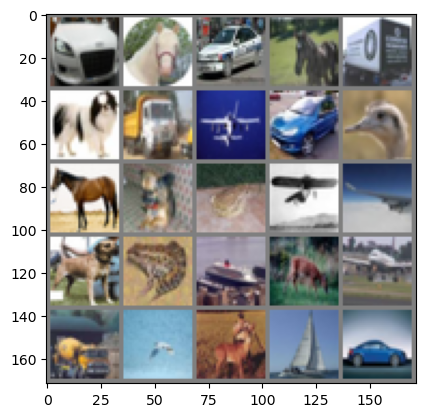

In [147]:
## the imports are very similar to before
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np

## defining the batch size 
batch_size = 32

## we want to have multiple tarnsforms this time
## so we use the compose and pass two transforms
## one for converting to tensors
## and the other to normalize the values to -1, 1
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((.5,.5,.5), (.5,.5,.5))]
)
## for this example we're using CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../data/',
                                            train=True, 
                                            transform=transform,
                                            download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../data/',
                                            train=False, 
                                            transform=transform)
## and then creating the loader obj
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

## and then taking a look at the data available in the set
def imshow(image):
    ## creating a grid from the image
    image = torchvision.utils.make_grid(image[:25], nrow=5)
    image = image/2 + 0.5 ## denormalize the data for showing
    image = image.numpy()
    plt.imshow(np.transpose(image, (1,2,0)))
    
## creating an iter obj
train_iter = iter(train_loader)
example_feat, example_lab = next(train_iter)
imshow(example_feat)

In [155]:
## next step is to create the actual model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        ## for this model
        ## we'll be using convolutional layers
        ## which needs the in and out channels, + kernel size
        ## which is 3, because we have 3 coln_samplerbg)
        self.conv1 = nn.Conv2d(3, 32, 3)
        ## we're also using the max pool layer
        self.pool = nn.MaxPool2d(2, 2) ## getting the max in 2*2 pixels
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.l1 = nn.Linear(64*4*4, 64)
        self.l2 = nn.Linear(64, 10) ## 10 classes 
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = self.l1(x)
        x = self.l2(x)
        return x
    
## defining the learning rate
learning_rate = 0.001
## initiating our instance of the model
model = ConvNet()

## since this is a multi-class classification
## we'll use the same loss as before
criterion = nn.CrossEntropyLoss()
## and the same optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

## and next we have to train our model
epochs = 5
for _ in range(epochs):
    for image, label in train_loader:
        ## getting the result
        output = model(image)
        ## claculating the loss
        loss = criterion(output, label)
        ## getting the gradient
        loss.backward()
        ## updating the values
        optimizer.step()
        ## and finally, clearing the grid
        optimizer.zero_grad()
    print(f'loss is {loss}')
## and saving the model
PATH = '../cnn.pth'
torch.save(model.state_dict(), '../cnn.pth')

loss is 1.4331231117248535
loss is 1.471756935119629
loss is 0.8354719281196594
loss is 0.9441784024238586
loss is 0.561827540397644


In [156]:
## and now for the test set
## we need to create another instance
## because we only saved the param dict of the model
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH))
loaded_model.eval()

with torch.no_grad():
    n_sample = len(test_loader.dataset)
    n_correct = 0
    t_n_correct = 0
    for image, label in test_loader:
        toutput = model(image)
        _, pred = torch.max(toutput, 1)
        t_n_correct += (pred == label).sum().item()
        
        output = loaded_model(image)
        _, pred = torch.max(output, 1)
        n_correct += (pred == label).sum().item()
        
    print(f'The accuracy for {n_sample} sample is {t_n_correct/n_sample * 100}% for trained {n_correct/n_sample * 100}% for loaded model')

The accuracy for 10000 sample is 70.06% for trained 70.06% for loaded model
